## Getting started

For those of you who haven't used notebooks like this before, they provide a convenient way to do exploratory data science work in a format that combines your code and its output in an easy-to-share way. Above, you will see a dropdown menu that allows you to switch a cell in the notebook between code and markdown text (like here).

To create a new cell below your current position, press the + button above. To run the code in a cell, or render your markdown text, press Shift+Enter.

To begin, we import a couple python libraries we'll need throughout the exercise.

In [1]:
import pandas as pd
import numpy as np

### Read in the data using pd.read_csv(), supplying the path to the data.

Inspect the first few rows of your data frame using the .head() method, supplying n=10 as an argument to show the top 10 rows.

In [2]:
tweets = pd.read_csv('tweets.csv')
tweets.head(n=10)

,X,tweet_text,directed_at,tweet_sentiment
0,1,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,negative
1,3,@swonderlin Can not wait for #iPad 2 also. The...,iPad,positive
2,5,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,positive
3,6,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,neutral
4,7,NaN,NaN,NaN
5,8,"#SXSW is just starting, #CTIA is around the co...",Android,positive
6,9,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,positive
7,10,Counting down the days to #sxsw plus strong Ca...,Apple,positive
8,11,Excited to meet the @samsungmobileus at #sxsw ...,Android,positive
9,12,Find &amp; Start Impromptu Parties at #SXSW Wi...,Android App,positive


### There's a problem -- we have some missing data. Let's remove lines in our data that don't contain a tweet.

Pandas makes this easy with the notnull() function. Take note of how Pandas makes use of square brackets to identify an individual column of that data frame.

Then, verify that the missing rows have been properly excluded.

In [3]:
tweets = tweets[pd.notnull(tweets['tweet_text'])]

### There are three columns of data here, but for now let's limit ourselves to tweet_text and tweet_sentiment. 

Assign each of these columns to new variables called "text" and "labels".

In [4]:
text = tweets['tweet_text']
labels = tweets['tweet_sentiment']

### Turning our text into numbers

Regardless of the data you're using, machine learning is always a mathematical task. That means we have to convert our raw text into a usable format -- in this case, counts of word occurrences. This next step also makes our first use of the scikit-learn ML library.

Take the CountVectorizer instance created below and apply it to the text of your tweets using the .fit() method.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
count_vect.fit(text)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

### What does the fitted CountVectorizer object look like?

Fitting count_vect to our data produces a matrix where the rows are tweets, and the columns represent every word in our "vocabulary" (i.e., our whole set of tweets). The first step in this is to figure out what those matrix dimensions will be. Check out the vocabulary&#95; object -- it is a mapping from vocabulary words to matrix columns:

In [6]:
count_vect.vocabulary_

{u'unscientific': 8943,
 u'hordes': 4133,
 u'pickmeupanipad2': 6313,
 u'yellow': 9505,
 u'four': 3400,
 u'prices': 6576,
 u'woods': 9399,
 u'hanging': 3903,
 u'16mins': 70,
 u'increase': 4348,
 u'html5': 4173,
 u'gad': 3509,
 u'eligible': 2815,
 u'gadgetoverload': 3512,
 u'lori': 5099,
 u'sxswdad': 8244,
 u'lord': 5097,
 u'newmusic': 5744,
 u'withme': 9370,
 u'bergstrom': 1059,
 u'dell': 2327,
 u'rancewilemon': 6811,
 u'leisurely': 4932,
 u'bringing': 1296,
 u'basics': 966,
 u'prize': 6599,
 u'customizable': 2190,
 u'wednesday': 9254,
 u'oooh': 5961,
 u'debuting': 2281,
 u'commented': 1825,
 u'smscifi': 7734,
 u'tired': 8590,
 u'miller': 5446,
 u'cpmpetition': 2074,
 u'pulse': 6693,
 u'270': 116,
 u'elegant': 2810,
 u'second': 7380,
 u'tether': 8444,
 u'penasaran': 6229,
 u'errors': 2928,
 u'unlisted': 8924,
 u'roddy': 7175,
 u'thunder': 8548,
 u'fingers': 3252,
 u'designing': 2368,
 u'succumb': 8116,
 u'reword_app': 7102,
 u'hero': 4015,
 u'dahl': 2210,
 u'reporter': 7021,
 u'freebeer

Use the .get() method and look up some words to see if they're in our vocabulary or not (if they are, .get() will return a number; if they aren't, it will return nothing). Notice anything interesting or surprising?

In [7]:
count_vect.vocabulary_.get("wouldn")

9438

Now that we've generated a vocabulary from our data, use the .transform() method to actually create the document-term matrix, supplying our text as an argument. Let's call the resulting matrix "counts".

In [8]:
counts = count_vect.transform(text)
print(counts)

  (0, 168)	1
  (0, 427)	1
  (0, 769)	2
  (0, 2267)	1
  (0, 3944)	1
  (0, 4168)	1
  (0, 4525)	1
  (0, 4562)	1
  (0, 5703)	1
  (0, 6406)	1
  (0, 7146)	1
  (0, 7984)	1
  (0, 8228)	1
  (0, 8606)	1
  (0, 8823)	1
  (0, 8964)	1
  (0, 9202)	1
  (0, 9272)	1
  (1, 523)	1
  (1, 769)	1
  (1, 1448)	1
  (1, 2614)	1
  (1, 3367)	1
  (1, 4513)	1
  (1, 5814)	1
  :	:
  (8933, 6029)	1
  (8933, 6239)	1
  (8933, 6293)	1
  (8933, 7207)	1
  (8933, 7919)	1
  (8933, 8171)	1
  (8933, 8228)	1
  (8933, 8300)	1
  (8933, 8534)	1
  (8933, 9367)	1
  (8934, 521)	1
  (8934, 575)	1
  (8934, 3007)	1
  (8934, 3367)	1
  (8934, 3809)	1
  (8934, 4515)	1
  (8934, 6073)	1
  (8934, 6378)	1
  (8934, 6698)	1
  (8934, 7429)	1
  (8934, 7446)	1
  (8934, 8198)	1
  (8934, 8228)	1
  (8934, 8520)	1
  (8934, 8994)	1


### Pause here for a moment before continuing on to modeling

After the group members have their data featurized, we'll talk for a bit about the machine learning approach we'll use in this lab: a Naive Bayes classifier.

The math involved in Naive Bayes is a bit complex, but scikit-learn makes it easy to train and use a model:

In [9]:
from sklearn.naive_bayes import MultinomialNB

### Training and playing around with your model

Now that we've imported MultinomialNB (a version of the classifier that can handle more than 2 labels), now we need to train it. This follows a two-step process very similar to what we did with CountVectorizer above: create a model instance, and then train it using the .fit() method. The only difference is that here, fit() will take TWO arguments -- counts and labels, in that order. 

In [10]:
model1 = MultinomialNB()
model1.fit(counts,labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Now that you've got your model trained, try evaluating its predictions on some sentences. What does it get right? Can you trick it into being wrong? How?

Here's a sample sentence to get you started. Just replace "model1" with the name of your trained model, and of course modify the sample sentence however you want:

In [11]:
print(model1.predict(count_vect.transform(["I love my iPhone!!"])))

['positive']


### Measuring model accuracy

Providing the model with sample sentences is fun, but it's not the best way to actually measure its performance. We need a large set of labeled data to really see how good the predictions are. Let's start by seeing how many of our tweets the model classifies correctly. As before, just replace "model1" with the name of your model:

In [12]:
predictions = model1.predict(counts)
sum(predictions == labels)/float(len(labels))

0.80861779518746502

### Train-test splits

You probably got about 80% accuracy from that comparison. Not bad! -- unfortunately, though, we can't trust that number. We can't evaluate a model using the data it was trained on -- that'd be cheating, because it already knows the answers to those items!

To start, let's take our data and divide it up into two parts, with about 80% of it for training our model and 80% for testing with. We have about 9000 rows of data to work with here, so let's train on the first 7500, and test on the rest. The code to create these subsets is included below for convenience; run it and then train and evaluate your model in the same way we did above.

In [13]:
counts_train = counts[0:7500]
counts_test = counts[7500:]
labels_train = labels[0:7500]
labels_test = labels[7500:]

In [14]:
model2 = MultinomialNB()
model2.fit(counts_train, labels_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [15]:
predictions2 = model2.predict(counts_test)
sum(predictions2 == labels_test)/float(len(labels_test))

0.65923344947735196

### Baselines

Wow! Not as good as we thought, huh? Is our model even any good at all? One way to answer that is by comparing our accuracy to a "baseline", i.e. a simple model that makes dumb (but still principled) predictions. One popular baseline measure would be to just predict the most common label for everything! Let's try that and compare. Take the dummy model created below and evaluate it on our train-test split in the same way you did above.

In [16]:
from sklearn.dummy import DummyClassifier
dummy_model = DummyClassifier(strategy='most_frequent')

In [17]:
dummy_model.fit(counts_train, labels_train)
dummy_predictions = dummy_model.predict(counts_test)
sum(dummy_predictions == labels_test)/float(len(labels_test))

0.59651567944250872

### Pause here for a moment before continuing on to further evaluation.

### Cross-validation

Let's cross-validate a classifier on our data and see how it holds up.

Below, create a new MultinomialNB instance, and then evaluate it using the cross_val_score() function. cross_val_score takes __4__ arguments: the model name, our "counts" and "labels" objects, and the number of iterations (or "folds") to use in the evaluation, in that order. The default number of folds is 3, but let's do 10 -- expressed as cv=10.

Assign the result of cross_val_score to a variable name of your choosing, and print it. Then print it's average, obtained via the .mean() method.

In [18]:
from sklearn.model_selection import cross_val_score
model3 = MultinomialNB()
scores = cross_val_score(model3, counts, labels, cv=10)
print(scores)
print(scores.mean())

[ 0.65995526  0.62863535  0.62192394  0.64317673  0.68680089  0.71364653
  0.69798658  0.66965286  0.62556054  0.6558296 ]
0.660316826971


Here, we got a bit lucky -- our average cross-validation accuracy is about the same as our original holdout. But it should still be clear why it's important to do this -- look at how much accuracy can vary from fold to fold!

### The Confusion Matrix

As a first step towards understanding how to improve our model, let's take a closer look at what it's getting wrong. To do this, we look at the __confusion matrix__, which matches up the labels the model predicted against the labels things actually had. Here, we stick with our previous train-test split for simplicity.

[[291 205   7]
 [180 643  33]
 [ 33  31  12]]


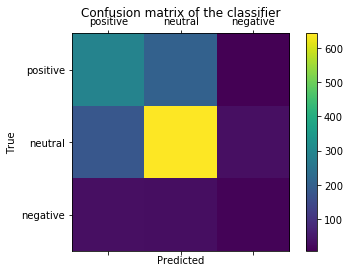

In [19]:
from sklearn.metrics import confusion_matrix
import pylab as pl

sentiment_labels = ['positive', 'neutral', 'negative']
cm = confusion_matrix(labels_test, predictions2, sentiment_labels)
print(cm)
fig = pl.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
pl.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + sentiment_labels)
ax.set_yticklabels([''] + sentiment_labels)
pl.xlabel('Predicted')
pl.ylabel('True')
pl.show()

In [41]:
from sklearn.metrics import classification_report
print(classification_report(labels_test, predictions2, sentiment_labels))

             precision    recall  f1-score   support

   positive       0.58      0.58      0.58       503
    neutral       0.73      0.75      0.74       856
   negative       0.23      0.16      0.19        76

avg / total       0.65      0.66      0.65      1435



The confusion matrix reveals a big issue with our data, and a big issue in machine learning in general: __class imbalance__. We have ___way___ more Neutral items than anything else, and very few Negative items at all! It should be clear that better-represented labels are captured better by the model, and that less well-represented items frequently get misclassified with one of the more common labels.

### Get more data!

Fortunately, we happen to have some additional negative tweets lying around. They're not exactly from the same dataset, but a pretty similar one so maybe they'll help out. Read in the negative_tweet_supplement.csv file as a new data frame, split out the columns, and add them to our existing "text" and "labels" objects using the .append() method.

In [20]:
new_negs = pd.read_csv("negative_tweet_supplement.csv")

In [21]:
new_neg_text = new_negs['tweet_text']
new_neg_labels = new_negs['tweet_sentiment']
longer_text = text.append(new_neg_text)
longer_labels = labels.append(new_neg_labels)

Now, because we have changed our original text object, we need to re-fit it with CountVectorizer and create a new document-term matrix, as we did earlier. Do that now:

In [22]:
count_vect.fit(longer_text)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [23]:
longer_counts = count_vect.transform(longer_text)

Now that we have added some more negative items to our data, let's redo our cross-validation with a new model, making sure to update the arguments in cross_val_score() to reflect any new variable names for our longer counts and labels objects.

In [24]:
model4 = MultinomialNB()
scores = cross_val_score(model4, longer_counts, longer_labels, cv=10)
print(scores)
print(scores.mean())

[ 0.61023622  0.5984252   0.57283465  0.69980315  0.76082677  0.78149606
  0.76279528  0.74975369  0.71893491  0.74728529]
0.700239121987


In [29]:
holdout = pd.read_csv("holdout_set.csv")

In [30]:
holdout_tweets = holdout['tweet_text']
holdout_labels = holdout['tweet_sentiment']

holdout_counts = count_vect.transform(holdout_tweets)

In [31]:
model4.fit(longer_counts, longer_labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
holdout_predictions = model4.predict(holdout_counts)

In [33]:
sum(holdout_predictions == holdout_labels)/float(len(holdout_labels))

0.53100000000000003

In [34]:
model5 = MultinomialNB()
holdout_xval_scores = cross_val_score(model5, holdout_counts, holdout_labels, cv=10)
print(scores)
print(scores.mean())

[ 0.61023622  0.5984252   0.57283465  0.69980315  0.76082677  0.78149606
  0.76279528  0.74975369  0.71893491  0.74728529]
0.700239121987


### Final bits: pipelines

The last feature of scikit-learn we want to touch on, and a powerful resource for machine learning in general, is the pipeline. This does not introduce much new content as much as it presents a way of chaining together the various bits of data preparation and modeling we have done so far. This is really useful for iterating on your model development, and also highlights a great feature of scikit-learn which is the consistency of object types and methods shared across its various core functions.

A couple new options are introduced here as well, without evaluation, as a way of getting you started on future work should you so choose. One of these is the ngram_count option within CountVectorizer -- this lets you include not just individual words, but word _sequences_, as features. That can be valuable -- think of the difference between "Great!" and "Oh, great!" (or even "I like" and "I don't like").

The other is a feature selection step that comes before model training. Currently, every word in our vocabulary is considered as informative when training the model. That seems fair, but is it the best thing to do? What about words that only occur once in the data, and have no further predictive value? There's only so much probability to go around, and the often very large number of these rare features can diminish the power of other more important ones. Feature selection also helps to combat __overfitting__, where the model learns its training data __too__ well, and has trouble generalizing. (Of course, being too aggressive can yield the opposite problem of underfitting as well -- you wouldn't want to train a model on just one feature out of thousands!)

In [35]:
stopwords = ['i', 'you', 'me', 'they', 'is', 'are', 'to', 'the', 'a', 'an', 'at', 'were', 'of', 'at']

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

p = Pipeline(steps=[('counts', CountVectorizer(ngram_range = (1,2), lowercase=False)),
                ('feature_selection', SelectKBest(chi2, k=6000)),
                ('multinomialnb', MultinomialNB())])
p.fit(longer_text, longer_labels)

Pipeline(steps=[('counts', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
       ...i2 at 0x116545a28>)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [37]:
holdout_preds = p.predict(holdout_tweets)

In [38]:
sum(holdout_preds == holdout_labels)/float(len(holdout_labels))

0.54525000000000001

## Additional directions

If you still have time (or want to keep working on this later!), there are several next steps you can consider playing around with. Here are a few suggestions to get you started.

#### Try out a different model!

Scikit-learn supports lots of different types of classifiers. You can find a list of them here, with links to more information about each: http://scikit-learn.org/stable/modules/multiclass.html. Much of the procedure you've learned fitting and evaluating Naive Bayes models will apply here as well.

(Logistic regression and random forest are both popular options)

#### Try out some new data!

I've included three other sentiment datasets here for you to play around with, with different types of subject matter: politics, air travel, and sports. Lots of options here:

* Repeating this modeling process on another dataset
* Seeing how well our existing model performs on new, possibly unrelated data
* Combining datasets in interesting ways to try and create the most robust model

This is really core data science work here. A big challenge faced in machine learning is that models are only as good as the data they're trained on, and their performance often suffers when they're applied to new stuff. Our model here is trained mainly on tweets about the iPhone and other Apple products. How well does it capture discussions about other topics? Can these datasets be combined to yield better overall results? What are the tradeoffs in doing this?

#### Go deep on model training and evaluation.

We've noted at various points that there have been a lot of options you can play with when you're featurizing your data, and when you're training your model. You can revisit these and see what the effects are of not lowercasing your text, of including two- or three-word phrases along with single words, or tweaking the settings of your classifier (maybe you want to weight classes differently to address imbalance, or maybe you want to explore different assumptions about how your variables are distributed). Maybe you want to explore feature selection to help combat __overfitting__ (http://scikit-learn.org/stable/modules/feature_selection.html, SelectKBest is a good place to start). Some of these things might have a big impact. Some might not change very much at all. Welcome to the often-less-than-straightforward world of model optimization!

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')